In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json 
import shutil
import sklearn as  sk
from sklearn.model_selection import train_test_split 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [0]:
os.chdir('/content/drive/My Drive/dsps')

In [5]:
ls

'Copy of DSPS2019 Extra Credit Project Proposal.md.gdoc'
 fig1datag.txt
'Homework 8'/
 jla_lcparams.txt
 jla_likelihood_v6.tgz
 kaggleHiggsBoson/
 pluto_18v2_1.csv
 PLUTODD18v2.1.pdf
 PlutoReadme18v2.1.pdf


##Kaggle validation

In [0]:
#need to make a hidden root directory to use the kaggle.json
#!mkdir ~/.kaggle

In [0]:
#Moving kggle.json from dsps to the root directory (need to import shutil)
#shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')


In [0]:
#changing .json to secure so others cant see it
#!chmod 600 /root/.kaggle/kaggle.json

In [0]:
#validating username and key for kaggle
#envs = json.load(open("/root/.kaggle/kaggle.json", "r"))
#os.environ["KAGGLE_USERNAME"] = envs['username']
#os.environ["KAGGLE_KEY"] = envs['key']


In [0]:
#checking kaggle validation
#!kaggle datasets list

##Data ingestion

In [0]:
#directory for kaggle downloads
#!mkdir kaggleHiggsBoson

In [6]:
cd kaggleHiggsBoson

/content/drive/My Drive/dsps/kaggleHiggsBoson


In [0]:
#download
#!kaggle competitions download -c higgs-boson

In [0]:
#ls

In [0]:
#unzipping training.zip 
#!unzip training.zip -d "/content/drive/My Drive/dsps/kaggleHiggsBoson"

In [0]:
#ls

- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS/blob/master/lab9/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data


##Reading and manipulating data

In [0]:
#reading in "training.csv"
higgsdata = pd.read_csv("training.csv")


#last two columns into numpy array (needed for sklearn split)
weights = higgsdata['Weight'].to_numpy()
labels = higgsdata['Label'].to_numpy()

#removing last two columns from higgsdata
higgsdata.drop(labels = ['Weight','Label'], axis = 1, inplace = True)


- Read in the trainind data. Split the provided training data into a training and a test set. 
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [66]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [17]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [18]:
labels

array(['s', 'b', 'b', ..., 's', 'b', 'b'], dtype=object)

In [19]:
weights

array([0.00265331, 2.23358449, 2.34738894, ..., 0.01863612, 1.68161144,
       1.87747381])

In [0]:
 hd_train, hd_test, l_train, l_test, w_train, w_test = sk.model_selection.train_test_split(higgsdata, labels, weights, test_size = 0.25, train_size = 0.75, random_state = 0)

- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


##Random Forest and  Gradient Boosted Classifier models

In [9]:
#leave 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 0)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [10]:
gbt = GradientBoostingClassifier(random_state = 0)
print('Parameters currently in use:\n')
print(gbt.get_params())

Parameters currently in use:

{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [11]:
rf.fit(hd_train.values, l_train)
gbt.fit(hd_train.values, l_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [12]:
rf.fit(hd_test.values, l_test)
gbt.fit(hd_test.values, l_test)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

calculate the  scores for the training and test sets and evaluate  overtraining etc

In [15]:
#rf training and test scores
print("Random Forest training score: {:.5f} \nRandom Forest test score: {:.5f}".format(rf.score(hd_train.values, l_train), rf.score(hd_test.values, l_test)))

Random Forest training score: 0.81844 
Random Forest test score: 0.98850


In [14]:
print("Gradient Boosting training score: {:.5f} \nGradient Boosting test score: {:.5f}".format(gbt.score(hd_train.values, l_train), gbt.score(hd_test.values, l_test)))


Gradient Boosting training score: 0.83129 
Gradient Boosting test score: 0.83630


- Produce a confusion matrix for each model and compare them


 



##Confusion Matrices 

In [0]:

# I creaded this function (mostly copied from sklearn examples). 
# You can use it to create the confusion matrix
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, figlabel, x, y, 
                          normalize=False,
                          title='',
                          cmap=pl.cm.bone, ):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """         
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    pl.xticks([0, 1], labels=["N", "P"])
    pl.ylim(-0.5,1.5)
    pl.yticks([0,1], labels=["N", "P"])    
    pl.title(title)
    pl.figtext(x, y, figlabel, ha = 'center') 
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = colorbar(im, cax=cax)
    

In [0]:
#Figure labels for confusion matrices 

rftrain_label = "Figure 1: Confusion matrix for the random forest generator using train values.\n\
the y axis represents the Postive/Negative we find and the x axis represents the\n\
actual Positive/Negative.Futhermore, the quadrants of the matrix are as folows:\n\
top left->false positive, top right->true positive, bottom left->true neagtive,\n\
bottom right->false negative. Based on the colors, we observe that a mjority of\n\
the values are in the true negative range and some are in the true positive range\n\
little of the train data falls in the false positve or false negative range"

rftest = "Figure 2: Confusion matrix for the random forest generator using test values.\n\
Based on the colors, we observe that a mjority of the values are in the true\n\
negative range and some are in the true positive range little of the train\n\
data falls in the false positve or false negative range. We see that there\n\
more true positive values in the test set than in the train set"

gbttrain = "Figure 3: Confusion matrix for the gradient boosting classifier using train values.\n\
Based on the colors, we observe that a mjority of the values are in the true\n\
negative range and some are in the true positive range little of the train\n\
data falls in the false positve or false negative range."

gbttest = "Figure 4: Confusion matrix for the gradient boosting classifier using test values.\n\
Based on the colors, we observe that a mjority of the values are in the true\n\
negative range and some are in the true positive range little of the train\n\
data falls in the false positve or false negative range. We cannot able to \n\
see if there are more true positive values in the test set than in the train set"


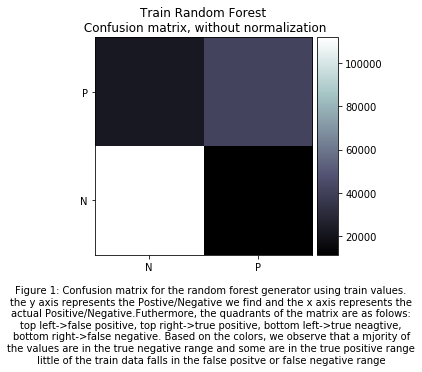

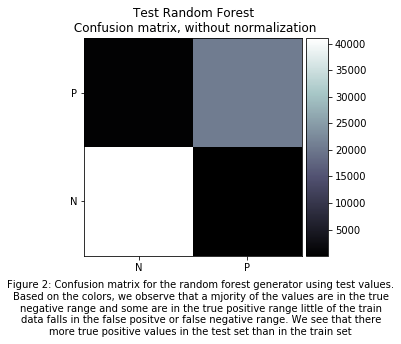

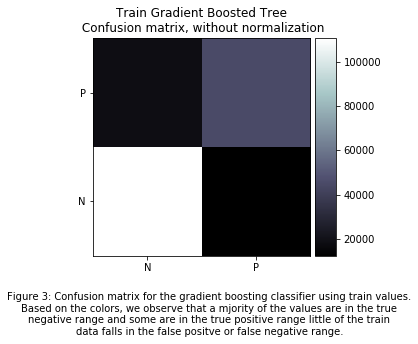

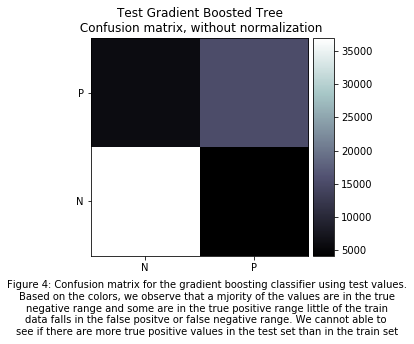

In [56]:
plot_confusion_matrix(l_train, rf.predict(hd_train.values), rftrain_label, 0.5,-.25, title = "Train Random Forest\n")
plot_confusion_matrix(l_test, rf.predict(hd_test.values), rftest,0.5, -0.15,  title = "Test Random Forest\n")
plot_confusion_matrix(l_train, gbt.predict(hd_train.values),gbttrain, 0.5, -.15,  title = "Train Gradient Boosted Tree\n")
plot_confusion_matrix(l_test, gbt.predict(hd_test.values), gbttest, 0.5,-.15,  title = "Test Gradient Boosted Tree\n")


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


##Random Forest and a Gradiend Boosted Tree Regressor models

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [29]:
rfR = RandomForestRegressor(n_estimators=100, max_depth=3,
                                  random_state=0)
rfR.fit(hd_train.values, w_train)
gbtR = GradientBoostingRegressor( n_estimators = 100, max_depth = 3, random_state = 0)
gbtR.fit(hd_train.values, w_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [30]:
print("L1 for Random Forest Regressor: {:.3f}".format(np.sum(np.abs(w_train - rfR.predict(hd_train.values)))))
print("L1 for Gradient Boosting Regressor: {:.3f}".format(np.sum(np.abs(w_train - gbtR.predict(hd_train.values)))))
print("L2 for Random Forest Regressor: {:.3f}".format(np.sum((w_train - rfR.predict(hd_train.values))**2)))
print("L2 for Greadient Boosting Regressor: {:.3f}".format(np.sum((w_train - gbtR.predict(hd_train.values))**2)))

L1 for Random Forest Regressor: 188650.357
L1 for Gradient Boosting Regressor: 157567.962
L2 for Random Forest Regressor: 344000.097
L2 for Greadient Boosting Regressor: 253038.373


- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

 



##Feature importance

In [35]:
important_features = rf.feature_importances_
important_columns = np.argsort(important_features)
sorted_columns = important_columns[27:]

higgs_important_feature = higgsdata.iloc[:, sorted_columns]
higgs_important_train = hd_train.iloc[:, sorted_columns]
higgs_important_test = hd_test.iloc[:, sorted_columns]
higgs_important_feature.head()

,PRI_tau_pt,DER_mass_vis,DER_mass_transverse_met_lep,DER_mass_MMC
0,32.638,97.827,51.655,138.470
1,42.014,103.235,68.768,160.937
2,32.154,125.953,162.172,-999.000
3,22.647,80.943,81.417,143.905
4,28.209,134.805,16.915,175.864


In [36]:
higgs_important_feature.shape

(250000, 4)

In [0]:
from sklearn.model_selection import RandomizedSearchCV


In [38]:
randomgrid = {"max_depth": [3, 10, None],
              "max_features": ['auto','sqrt'],
              "n_estimators": [10,100,1000]}
print(randomgrid)


{'max_depth': [3, 10, None], 'max_features': ['auto', 'sqrt'], 'n_estimators': [10, 100, 1000]}


 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [0]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 18 different combinations
random_search = RandomizedSearchCV(estimator = rf, param_distributions=randomgrid,
                                   n_iter=1, cv=3, iid=False)


Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [50]:
random_search.fit(higgs_important_train, l_train)
                  

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,
  

In [51]:
print("Tuned RF  Parameters: {}".format(random_search.get_params()))
print("Best score is {}".format(random_search.score(higgs_important_train,l_train)))


Tuned RF  Parameters: {'cv': 3, 'error_score': 'raise-deprecating', 'estimator__bootstrap': True, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': 'auto', 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 10, 'estimator__n_jobs': None, 'estimator__oob_score': False, 'estimator__random_state': 0, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_esti

In [0]:
df = pd.DataFrame(random_search.cv_results_)


In [65]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,41.127083,0.311495,2.157406,0.026353,100,sqrt,None,"{'n_estimators': 100, 'max_features': 'sqrt', ...",0.806371,0.808416,0.805405,0.806731,0.001255,1


# Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it. 

In [62]:
rf.fit(hd_train, l_train.flatten()=="s")

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

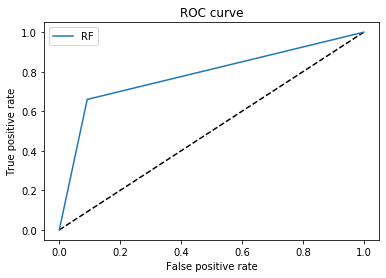

In [64]:
# The random forest model by itself
from sklearn.metrics import roc_curve
y_pred_grd_rfcat = rf.predict_proba(hd_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(l_test.flatten()=="s", rf.predict(hd_test))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


**Figure 5:** the Receiver Operating Characteristic curve for optimized random forest generator. The curve labeled RF shows that true positive rate is optimized when the false positve rate is near to 0.1. the Curve is optimized when true positive rate is as close to 1 and false positive rate is as close to 0 as possible for for the given data.